# `201800812a` - Getting one image ?

In [1]:
#!/usr/bin/python
import spidev
#import RPi.GPIO as GPIO
import time
import numpy as np
import matplotlib 
from scipy import signal
import matplotlib.pyplot as plt
import json
import time
from pyUn0 import *
from scipy import fftpack

Not loading RPi.GPIO as not on RPi


Data acquired


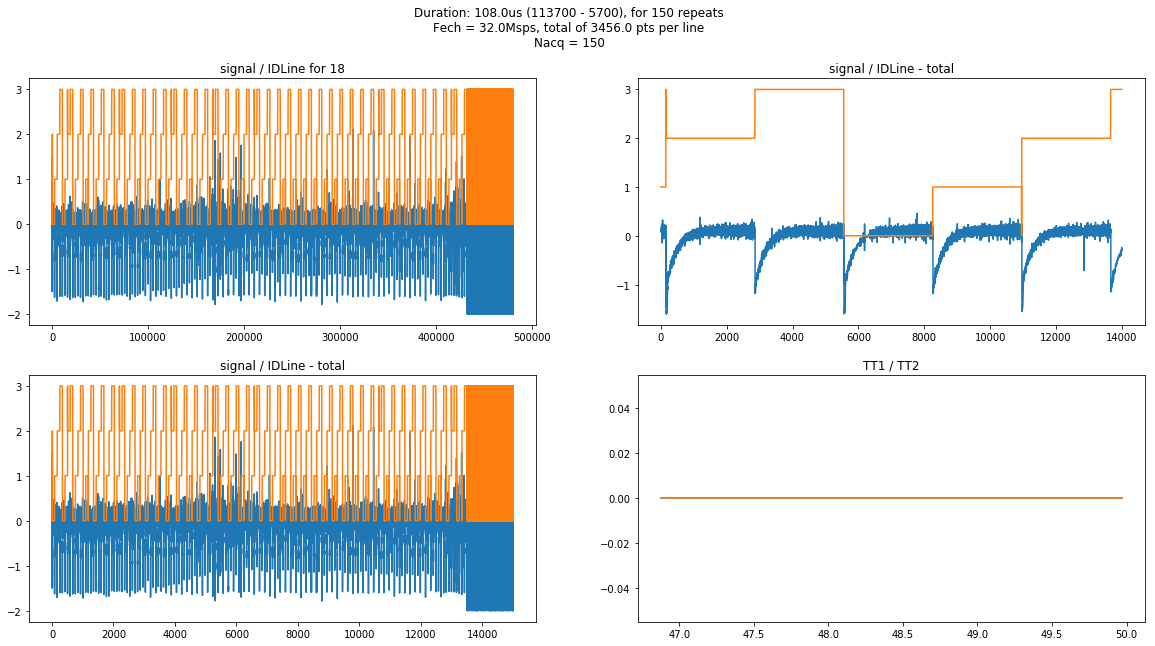

In [2]:
for FILE in ["data/20180812a-18.json"]:
    x = us_json()
    x.JSONprocessing(FILE)
    # row and column sharing
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,10))
    Duration = (x.parameters['LengthAcq']-x.parameters['DeltaAcq'])/1000.0
    Title = "Duration: "+str(Duration)+"us ("+str(x.parameters['LengthAcq'])+" - "
    Title+= str(x.parameters['DeltaAcq'])+"), for "+str(x.Nacq)
    Title += " repeats\n"
    Title += "Fech = "+str(x.f)+"Msps, total of "+str(float(x.f)*Duration)+" pts per line\n" 
    Title += "Nacq = "+str(x.Nacq)
    plt.suptitle(Title)
    #plt.figure()
    A = 4000
    B = 6000
    ax1.plot(x.tmp)
    ax1.plot(x.IDLine)
    ax1.set_title('signal / IDLine for '+str(x.N))
    A =340000
    ax2.plot(x.tmp[A:A+14000])
    ax2.plot(x.IDLine[A:A+14000])
    ax2.set_title('signal / IDLine - total')
    ax3.plot(x.t,x.tmp)
    ax3.plot(x.t,x.IDLine)
    ax3.set_title('signal / IDLine - total')
    ax4.plot(x.t[1500:1600],x.TT1[1500:1600])
    ax4.plot(x.t[1500:1600],x.TT2[1500:1600])
    ax4.set_title('TT1 / TT2')
    plt.show()
    #plt.tight_layout()
    FileName = "images/"+x.iD+"-"+str(x.N)+"-all.jpg"
    f.savefig(FileName)

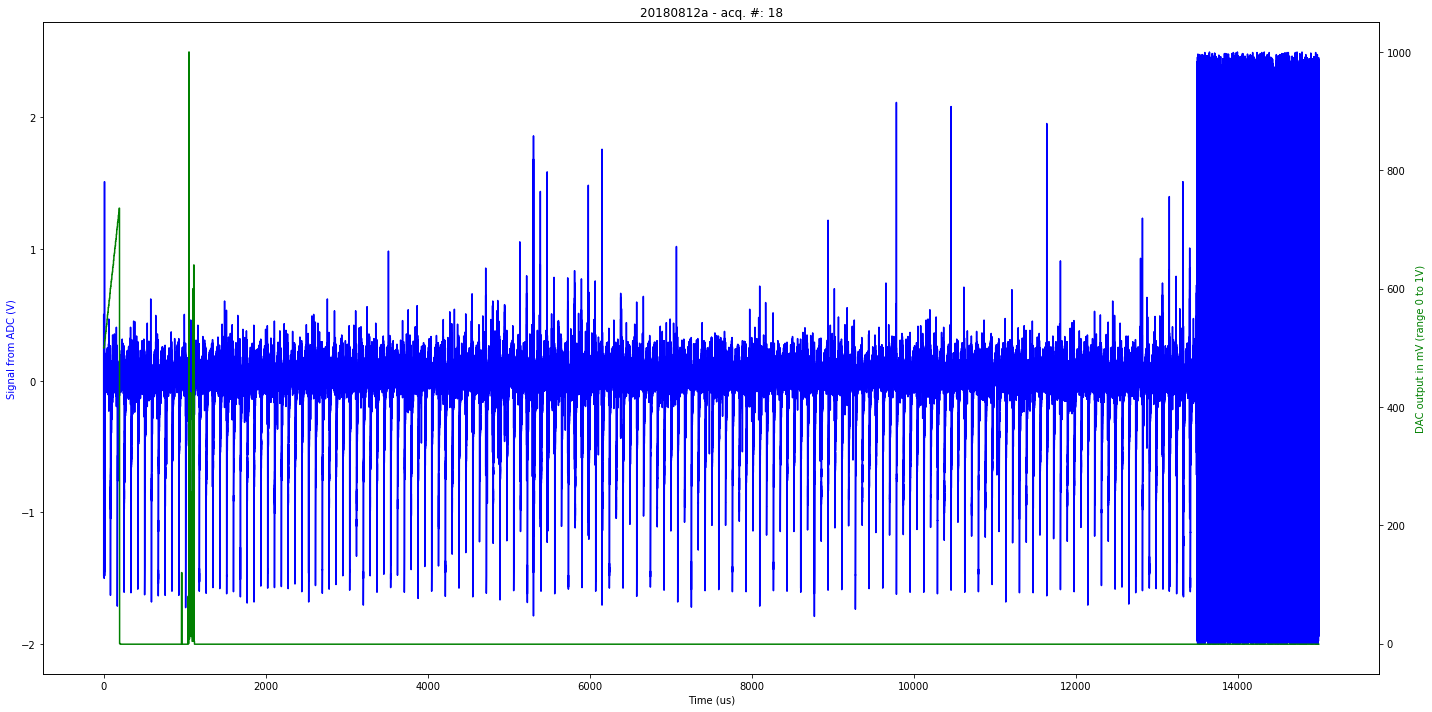

In [52]:
x.mkImg()

# Creating counters to know what lines are where

## It seems however to have an issue, lines are 2700 long instead of 108x32.

In [53]:
ID = []
Counter = 0
ps = 0
PS = []
L = []
for i in range(len(x.tmp)):
    if i < len(x.tmp) - 50:
        if (x.IDLine[i] ==  x.IDLine[i+1]) and  (x.IDLine[i] <> x.IDLine[i+2]):
            if (i - ps) > 2500:
                L.append(i-ps)
                print Counter,i,L[-1]
                Counter = Counter + 1
                ps = i
                PS.append(i)
        else:
            ID.append(Counter)
    else:
        ID.append(-1)
        
del PS[0]
del ID[0]
del L[0]

0 2654 2654
1 5354 2700
2 8054 2700
3 10753 2699
4 13454 2701
5 16153 2699
6 18854 2701
7 21553 2699
8 24254 2701
9 26954 2700
10 29654 2700
11 32354 2700
12 35054 2700
13 37753 2699
14 40454 2701
15 43153 2699
16 45854 2701
17 48553 2699
18 51254 2701
19 53954 2700
20 56654 2700
21 59354 2700
22 62054 2700
23 64753 2699
24 67454 2701
25 70153 2699
26 72854 2701
27 75553 2699
28 78254 2701
29 80953 2699
30 83654 2701
31 86354 2700
32 89054 2700
33 91753 2699
34 94454 2701
35 97153 2699
36 99854 2701
37 102553 2699
38 105254 2701
39 107953 2699
40 110654 2701
41 113354 2700
42 116054 2700
43 118753 2699
44 121454 2701
45 124153 2699
46 126854 2701
47 129553 2699
48 132254 2701
49 134953 2699
50 137654 2701
51 140354 2700
52 143054 2700
53 145753 2699
54 148454 2701
55 151153 2699
56 153854 2701
57 156553 2699
58 159254 2701
59 161953 2699
60 164654 2701
61 167353 2699
62 170054 2701
63 172754 2700
64 175454 2700
65 178153 2699
66 180854 2701
67 183553 2699
68 186254 2701
69 188954 2700


In [4]:
l = int(np.average(L[0:10]) - 4)

## Making the image

In [5]:
IMG = []
for k in range(150):
    IMG.append(x.tmp[PS[k]:PS[k]+l])

In [6]:
np.asarray(IMG)

array([[ 0.22265625, -0.3203125 ,  0.0078125 , ...,  0.07421875,
         0.06640625,  0.0703125 ],
       [-0.1796875 ,  0.109375  ,  0.05859375, ...,  0.09375   ,
         0.08984375,  0.08203125],
       [ 0.0859375 ,  0.09375   , -0.08203125, ...,  0.12890625,
         0.03125   ,  0.03125   ],
       ..., 
       [ 0.0859375 ,  0.16015625,  0.015625  , ...,  0.08203125,
         0.0859375 ,  0.0703125 ],
       [ 0.015625  , -0.078125  ,  0.015625  , ..., -0.00390625,
         0.03515625,  0.2265625 ],
       [ 0.1640625 ,  0.234375  ,  0.171875  , ...,  0.00390625,
        -0.02734375,  0.1640625 ]])

In [55]:
X,Y = np.shape(IMG)
IMGLINE = np.reshape(IMG, X*Y)
X,Y

(150, 2696)

## Filtering the image

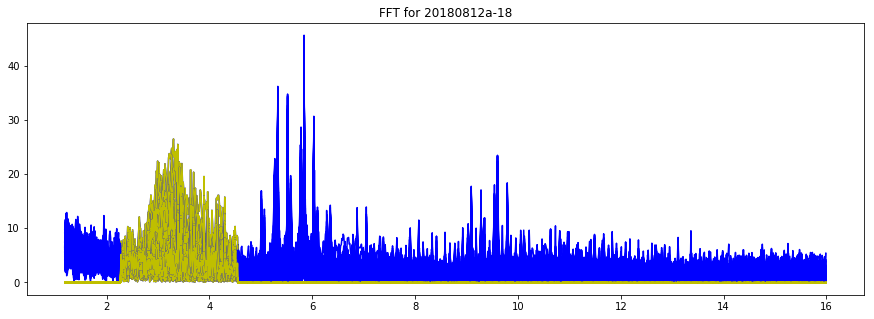

In [70]:
Filtered = []
plt.figure(figsize=(15,5))
plt.title("FFT for "+x.iD+"-"+str(x.N))
for p in range(X):

    FFT = np.fft.fft(IMG[p])
    L = len(FFT)
    Frq = [32.0*k/L for k in range(L)]
    plt.plot(Frq[100:L/2],np.abs(FFT)[100:L/2],"b")
    
    FFTFiltered = FFT    
    for fff in range(L/2+1):
        if Frq[fff] < 0.65*3.5 or Frq[fff] > 1.3*3.5:
            FFTFiltered[fff] = 0
            FFTFiltered[-fff] = 0
    Filtered.append(np.real(np.fft.ifft(FFTFiltered)))
    plt.plot(Frq[100:L/2],np.abs(FFTFiltered)[100:L/2],"y")
plt.show()
FileName = "images/FFT"+x.iD+"-"+str(x.N)+"-wirephantom.jpg"
plt.savefig(FileName)

In [11]:
Nl = len(Filtered[1])
fftpack.helper.next_fast_len(Nl)

2700

In [12]:
%timeit np.abs(signal.hilbert(Filtered[2],N=2700))

The slowest run took 155.67 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 191 µs per loop


In [13]:
%timeit np.abs(signal.hilbert(Filtered[1],N=2700))

1000 loops, best of 3: 192 µs per loop


In [14]:
H = []
for i in range(150):
    H.append( np.asarray(np.abs(signal.hilbert(Filtered[i],N=2700))) )


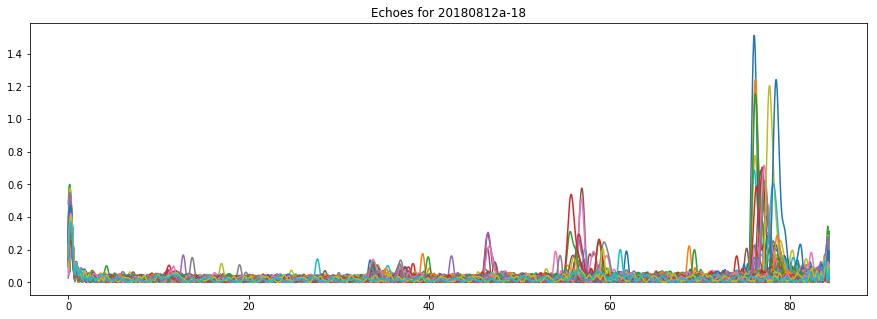

In [79]:
plt.figure(figsize=(15,5))
plt.title("Echoes for "+x.iD+"-"+str(x.N))
for i in range(150):
    plt.plot(x.t[0:len(H[i])],H[i])
plt.show()
FileName = "images/echoes-"+x.iD+"-"+str(x.N)+"-wirephantom.jpg"
plt.savefig(FileName)

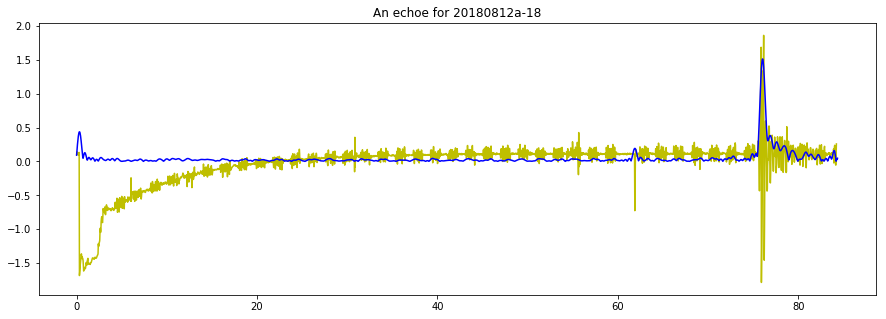

In [82]:
plt.figure(figsize=(15,5))
plt.title("An echoe for "+x.iD+"-"+str(x.N))
plt.plot(x.t[0:len(IMG[60])],IMG[60],"y")
plt.plot(x.t[0:len(H[60])],H[60],"b")
plt.show()
FileName = "images/echoe-"+x.iD+"-"+str(x.N)+"-wirephantom.jpg"
plt.savefig(FileName)

## Making the image

In [56]:
y0 = signal.decimate(H, int(32*1.33), 3)

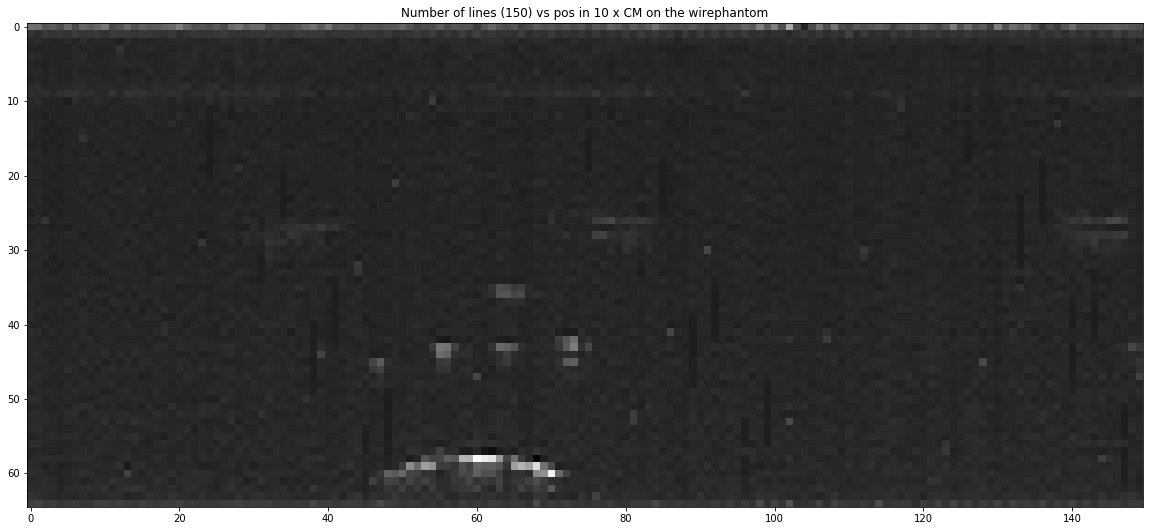

In [88]:
plt.figure(figsize=(20,10))
plt.title ("Number of lines (150) vs pos in 10 x CM on the wirephantom")
plt.imshow(np.transpose(np.sqrt(y0+0.1)),cmap='gray')
plt.show()
FileName = "image-"+x.iD+"-"+str(x.N)+"-wirephantom.png"
#plt.savefig(FileName)
plt.imsave(FileName,np.transpose(np.sqrt(y0+0.1)))

In [84]:
x.parameters

{u'DeltaAcq': 5700,
 u'DeltaAcq_Real': 570,
 u'LengthAcq': 113700,
 u'LengthAcq_Real': 11370,
 u'PeriodAcq': 2000000,
 u'PeriodAcq_Real': 200000,
 u'Poff': 2500,
 u'Poff_Real': 250,
 u'Pon': 200,
 u'Pon_Real': 20,
 u'PulsesDelay': 300,
 u'PulsesDelay_Real': 30}